# Blending Hex Colors

## [Pick Some Colors](https://g.co/kgs/DDXXi4y)

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba_array
from mycolorpy import colorlist as mcp

from string import hexdigits

## Average Two Hexadecimal Numbers

In [2]:
def avg_hexes(hex_one, hex_two):
    """
    Given two hex-code numbers and
    Returns this average hex-code
    """    
    one_int = int(hex_one, 16)
    two_int = int(hex_two, 16)
    mix_int = int(np.mean([one_int, two_int]))
    mix_hex = hex(mix_int)[2:]
    
    return mix_hex
    
print(avg_hexes.__doc__)


    Given two hex-code numbers and
    Returns this average hex-code
    


## Mix Two Hex-Code Colors

In [3]:
def mix_colors(color_one, color_two):
    """
    Mixes two hex-code colors and
    Returns this mixed hex-code
    """
    red_mix_hex = f"{avg_hexes(color_one[1:3], color_two[1:3]):02}"  
    green_mix_hex = f"{avg_hexes(color_one[3:5], color_two[3:5]):02}"  
    blue_mix_hex = f"{avg_hexes(color_one[5:7], color_two[5:7]):02}"  
    mix_hex = '#' + red_mix_hex + green_mix_hex + blue_mix_hex
    
    return mix_hex
    
print(mix_colors.__doc__)    


    Mixes two hex-code colors and
    Returns this mixed hex-code
    


## Hexadecimal Space

In [4]:
def array_hexes(hex_one, hex_two, fillers=1):
    """
    Given two hexadecimal numbers
     and the number of intermediary numbers wanted
    Returns linear distribution of hexes
    """
    start_int = int(hex_one, 16)
    end_int = int(hex_two, 16)
    hexes = np.linspace(start_int, end_int, 2+fillers)
    hexes = [f'{hex(int(n))[2:]:02}' for n in hexes]
    
    return hexes

print(array_hexes.__doc__)
print(array_hexes('00', 'ff', 3,))


    Given two hexadecimal numbers
     and the number of intermediary numbers wanted
    Returns linear distribution of hexes
    
['00', '3f', '7f', 'bf', 'ff']


## Hex Color Space

In [5]:
def array_hex_colors(hex_color_one, hex_color_two, fillers=1):
    """
    Given two hex-code colors
     and the number of intermediary colors wanted
    Returns linear distribution of hex colors
    """
    reds = array_hexes(hex_color_one[1:3], hex_color_two[1:3], fillers)
    greens = array_hexes(hex_color_one[3:5], hex_color_two[3:5], fillers)
    blues = array_hexes(hex_color_one[5:7], hex_color_two[5:7], fillers)
    colors = []
    for i in range(fillers+2):
        colors.append('#'+reds[i]+greens[i]+blues[i])
    return colors
    
print(array_hex_colors.__doc__)
print(array_hex_colors('#000000', '#ffffff', 4,))


    Given two hex-code colors
     and the number of intermediary colors wanted
    Returns linear distribution of hex colors
    
['#000000', '#333333', '#666666', '#999999', '#cccccc', '#ffffff']


## Hex Color Double Space

In [6]:
def array_double_hex_colors(hex_color_one, hex_color_two, hex_color_three, fillers_one_two, fillers_two_three):
    """
    Takes three hex code colors
      and two numbers of fillers 
    Returns list of hex code colors with fillers
    """
        
    colors_one = array_hex_colors(hex_color_one, hex_color_two, fillers_one_two)
    colors_two = array_hex_colors(hex_color_two, hex_color_three, fillers_two_three)
  
    return colors_one[:] + colors_two[1:]

print(array_hex_colors.__doc__)
print(array_double_hex_colors('#000000', '#ff00ff', '#ffffff', 2, 4))


    Given two hex-code colors
     and the number of intermediary colors wanted
    Returns linear distribution of hex colors
    
['#000000', '#550055', '#aa00aa', '#ff00ff', '#ff33ff', '#ff66ff', '#ff99ff', '#ffccff', '#ffffff']


## Hex Color Multi Space

In [7]:
def array_palette(hexes, fillers):
    """
    Takes list of hex color codes
      and number of fillers after each code
      before the next hex color code
      (last filler ignored, if provided)
    Returns list of hex code colors with fillers
    """
    color_list = []
    for c in range(len(hexes)-1):
        new_colors = array_hex_colors(hexes[c], hexes[c+1], fillers[c])
        color_list = new_colors if c == 0 else color_list + new_colors[1:]
    return color_list

print(array_palette.__doc__)
print(array_palette(['#000000', '#ff00ff', '#ffffff'], 
                    [2,          4]))


    Takes list of hex color codes
      and number of fillers after each code
      before the next hex color code
      (last filler ignored, if provided)
    Returns list of hex code colors with fillers
    
['#000000', '#550055', '#aa00aa', '#ff00ff', '#ff33ff', '#ff66ff', '#ff99ff', '#ffccff', '#ffffff']


## Hex Color Palette Plot

In [8]:
def plot_palette(hexes):
    """
    Takes list of color hex code colors
    Plots these colors with hex labels
    """
    
    num_colors = len(hexes)
    width = num_colors if num_colors < 16 else 16

    fig, axes = plt.subplots(1, 1, figsize=(width,1))
    axes.imshow(to_rgba_array(hexes).reshape(1, num_colors, 4))
    axes.spines[:].set_visible(False)
    axes.set_xticks(range(num_colors))
    axes.set_xticklabels(hexes)
    axes.set_yticks([])
    if num_colors > 16:
        plt.xticks(rotation=30)    
    plt.show()

print(plot_palette.__doc__)


    Takes list of color hex code colors
    Plots these colors with hex labels
    


## Testing

In [9]:
first = '#000000'
second = '#00ff00'
third = '#ffffff'
fillers_1_2 = 3
fillers_2_3 = 2

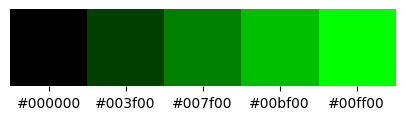

In [10]:
colors_one =array_hex_colors(first, second, fillers_1_2)
plot_palette(colors_one)

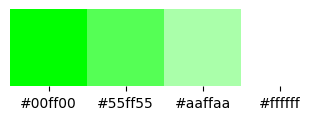

In [11]:
colors_two =array_hex_colors(second, third, fillers_2_3)
plot_palette(colors_two)

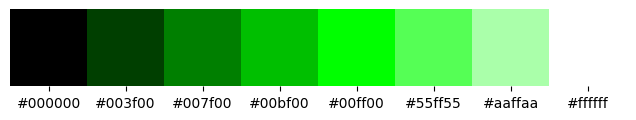

In [12]:
full_colors = array_double_hex_colors(first, second, third, fillers_1_2, fillers_2_3)
plot_palette(full_colors)

## Final 

### [Find Colors](https://g.co/kgs/DDXXi4y)

['#3f66d1', '#6c58d2', '#9a4ad4', '#b4319b', '#ce1862', '#e9002a']


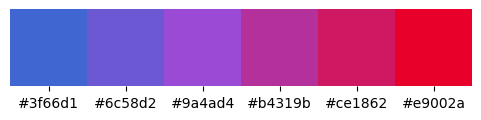

In [13]:
color_palette = array_palette(['#3f66d1', '#9a4ad4', '#e9002a', ], 
                              [ 1,         2,                   ])
print(color_palette)
plot_palette(color_palette)

['#eb3110', '#e96f32', '#e8ad55', '#e7eb78', '#aff280', '#78fa89', '#79eeba', '#7ae3eb']


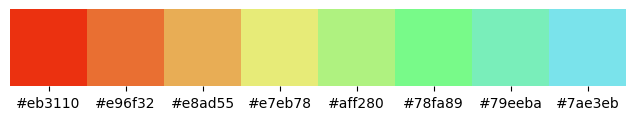

In [14]:
color_palette = array_palette(['#eb3110', '#e7eb78', '#78fa89', '#7ae3eb'], 
                              [ 2,         1,         1          ])
print(color_palette)
plot_palette(color_palette)